<a href="https://colab.research.google.com/github/Nikhil07-source/Machine_Learning_Algorithms/blob/main/AdaBoost_Alog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Nikhil07-source/Machine-Learning/refs/heads/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Setting values in X & Y

In [ ]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df[['Outcome']]

## Splitting Dataframe in Train Test in 80:20 ratio

In [ ]:
from sklearn.model_selection import train_test_split  #using sklearn library to split dataframe in train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

#Checking the shape of Train & Test Data
print('X Train shape: ', X_train.shape)
print('X Test shape: ', X_test.shape)
print('y Train shape: ', y_train.shape)
print('y Test shape: ', y_test.shape)

X Train shape:  (614, 8)
X Test shape:  (154, 8)
y Train shape:  (614, 1)
y Test shape:  (154, 1)


## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=25)  #learning_rate, n_estimator (we can change the values of these and record output.)
#Larger learning_rate will make the algorithm faster, but we try with smaller learning_rate


ada.fit(X_train, y_train)  #training the model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=25)

### Importing Confusion Matrix and doing prediction with train data

In [ ]:
#importing confusing matrix
from sklearn.metrics import confusion_matrix, classification_report #classification_report is for getting accuracy,precesion,recall etc.

####Doing prediction on Train Data

In [ ]:
prediction_train = ada.predict(X_train)

print(confusion_matrix(y_train,prediction_train))
print('*******************************************')
print(classification_report(y_train,prediction_train))

[[364  40]
 [104 106]]
*******************************************
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       404
           1       0.73      0.50      0.60       210

    accuracy                           0.77       614
   macro avg       0.75      0.70      0.72       614
weighted avg       0.76      0.77      0.75       614



####Doing prediction on Test Data

In [ ]:
prediction_test = ada.predict(X_test)

print("**********Confusion Matrix**********")
print(confusion_matrix(y_test,prediction_test))

print("**********Classification Report**********")
print(classification_report(y_test, prediction_test))

**********Confusion Matrix**********
[[88  8]
 [27 31]]
**********Classification Report**********
              precision    recall  f1-score   support

           0       0.77      0.92      0.83        96
           1       0.79      0.53      0.64        58

    accuracy                           0.77       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.77      0.76       154



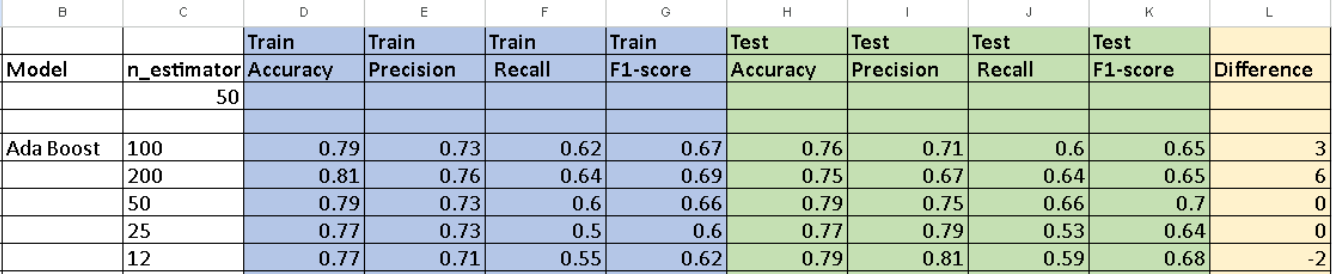